In [1]:
import os
import os.path
import glob
import numpy as np
import Image,leargist
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import sklearn_evaluation.plot as skplot
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

In [2]:
imagedir = "Datasets/ByFamilyImagesWidth"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
X = np.zeros((num_samples, 320))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.png'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        im = Image.open(img_file)
        im1 = im.resize((64,64),Image.ANTIALIAS); # for faster computation
        des = leargist.color_gist(im1)
        X[cnt] = des[0:320]
        cnt += 1
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:         allaple	Number of images: 362
Label: 1	Family:           alman	Number of images: 325
Label: 2	Family:          autoit	Number of images: 261
Label: 3	Family:            daws	Number of images: 466
Label: 4	Family:            delf	Number of images: 359
Label: 5	Family:         gamarue	Number of images: 259
Label: 6	Family:          ibryte	Number of images: 347
Label: 7	Family:          loring	Number of images: 285
Label: 8	Family:          mydoom	Number of images: 578
Label: 9	Family:          qukart	Number of images: 253
Label:10	Family:          ramnit	Number of images: 506
Label:11	Family:          sality	Number of images: 1401
Label:12	Family:          simbot	Number of images: 1148
Label:13	Family:       softpulse	Number of images: 912
Label:14	Family:          viking	Number of images: 183
Label:15	Family:         virlock	Number of images: 373
Label:16	Family:          vobfus	Number of images: 405
Label:17	Family:          wapomi	Number of images: 345
Label:18

In [4]:
X.shape

(10136, 320)

In [5]:
# Training top_model
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

top_model = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=cv, verbose=10, n_jobs=20)
top_model.fit(X,y)  # Training 

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 .....

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    5.1s


[CV] ........................... C=0.01, score=0.566568, total=   5.2s
[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.573964, total=   6.1s
[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.567554, total=   6.2s
[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.578402, total=   6.8s
[CV] C=100.0 .........................................................
[CV] ............................ C=0.1, score=0.707594, total=   7.3s
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.689349, total=   7.6s
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.711045, total=   7.8s
[CV] C=1000.0 ........................................................
[CV] .

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   12.2s


[CV] ............................ C=1.0, score=0.774162, total=  24.9s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.784517, total=  32.4s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.782544, total=  34.4s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.765286, total=  34.8s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.777120, total=  35.1s
[CV] C=10000.0 .......................................................
[CV] ........................... C=10.0, score=0.818540, total= 2.1min
[CV] C=100000.0 ......................................................
[CV] ........................... C=10.0, score=0.810158, total= 2.2min
[CV] C=100000.0 ......................................................
[CV] .

[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:  2.9min


[CV] ......................... C=1000.0, score=0.738166, total= 3.0min
[CV] C=1000000.0 .....................................................
[CV] ......................... C=1000.0, score=0.723866, total= 3.0min
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.821499, total= 3.1min
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.816568, total= 3.1min
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.813609, total= 3.2min
[CV] C=10000000.0 ....................................................
[CV] .......................... C=100.0, score=0.813609, total= 3.2min
[CV] C=10000000.0 ....................................................
[CV] ......................... C=1000.0, score=0.790927, total= 3.1min
[CV] C=10000000.0 ....................................................
[CV] .

[Parallel(n_jobs=20)]: Done  33 out of  65 | elapsed:  4.2min remaining:  4.1min


[CV] ........................ C=10000.0, score=0.760355, total= 3.6min
[CV] C=100000000.0 ...................................................
[CV] ........................ C=10000.0, score=0.775148, total= 3.8min
[CV] C=100000000.0 ...................................................
[CV] ....................... C=100000.0, score=0.777613, total= 3.1min
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.800296, total= 3.1min
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.789941, total= 2.9min
[CV] C=1000000000.0 ..................................................
[CV] ...................... C=1000000.0, score=0.792899, total= 2.9min
[CV] C=1000000000.0 ..................................................
[CV] ...................... C=1000000.0, score=0.800296, total= 3.0min
[CV] C=1000000000.0 ..................................................


[Parallel(n_jobs=20)]: Done  40 out of  65 | elapsed:  6.2min remaining:  3.9min


[CV] ....................... C=100000.0, score=0.796351, total= 3.3min
[CV] C=10000000000.0 .................................................
[CV] ....................... C=100000.0, score=0.795365, total= 3.4min
[CV] C=10000000000.0 .................................................
[CV] ..................... C=10000000.0, score=0.777613, total= 3.0min
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.776134, total= 3.5min
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.770217, total= 3.4min
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.743590, total= 3.4min
[CV] ..................... C=10000000.0, score=0.777613, total= 3.3min


[Parallel(n_jobs=20)]: Done  47 out of  65 | elapsed:  6.7min remaining:  2.6min


[CV] ..................... C=10000000.0, score=0.817061, total= 3.4min
[CV] ..................... C=10000000.0, score=0.785010, total= 3.4min
[CV] .................... C=100000000.0, score=0.774655, total= 3.2min
[CV] ..................... C=10000000.0, score=0.809665, total= 3.4min
[CV] .................... C=100000000.0, score=0.794872, total= 3.2min
[CV] .................... C=100000000.0, score=0.777613, total= 3.3min
[CV] .................... C=100000000.0, score=0.702663, total= 3.3min


[Parallel(n_jobs=20)]: Done  54 out of  65 | elapsed:  7.5min remaining:  1.5min


[CV] .................... C=100000000.0, score=0.780079, total= 3.2min
[CV] ................... C=1000000000.0, score=0.794872, total= 2.8min
[CV] ................... C=1000000000.0, score=0.774655, total= 2.9min
[CV] ................... C=1000000000.0, score=0.758876, total= 2.7min
[CV] ................... C=1000000000.0, score=0.786489, total= 2.5min
[CV] .................. C=10000000000.0, score=0.800296, total= 2.3min
[CV] .................. C=10000000000.0, score=0.769231, total= 2.3min


[Parallel(n_jobs=20)]: Done  61 out of  65 | elapsed:  8.5min remaining:   33.4s


[CV] ................... C=1000000000.0, score=0.786982, total= 2.4min
[CV] .................. C=10000000000.0, score=0.781065, total= 2.0min
[CV] .................. C=10000000000.0, score=0.748521, total= 2.4min
[CV] .................. C=10000000000.0, score=0.732249, total= 2.5min


[Parallel(n_jobs=20)]: Done  65 out of  65 | elapsed:  8.9min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [6]:
print("Best parameters: %s - score: %0.4f" % (top_model.best_params_, top_model.best_score_))

Best parameters: {'C': 100.0} - score: 0.8179


In [7]:
top_model.cv_results_

{'mean_fit_time': array([   5.754814  ,    8.59235106,   32.29269776,  153.10900264,
         180.34947238,  195.40900416,  209.67398744,  190.26338024,
         194.55319381,  198.71025543,  195.53718572,  159.86970196,
         138.49841723]),
 'mean_score_time': array([ 0.02979479,  0.02142801,  0.02181163,  0.0555624 ,  0.01079497,
         0.01433563,  0.01237955,  0.01759443,  0.01062179,  0.01247239,
         0.01679425,  0.01076002,  0.00728626]),
 'mean_test_score': array([ 0.57149901,  0.70424063,  0.77672584,  0.81449704,  0.8178501 ,
         0.77061144,  0.7622288 ,  0.79191321,  0.77662722,  0.7933925 ,
         0.76597633,  0.78037475,  0.76627219]),
 'mean_train_score': array([ 0.57520967,  0.70915146,  0.79097188,  0.8527627 ,  0.88182042,
         0.83029107,  0.82192896,  0.85949679,  0.84570794,  0.8627035 ,
         0.82639369,  0.85064134,  0.82831771]),
 'param_C': masked_array(data = [0.01 0.10000000000000001 1.0 10.0 100.0 1000.0 10000.0 100000.0 1000000.0
  10

In [8]:
top_model.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.57150, std: 0.00433, params: {'C': 0.01},
 mean: 0.70424, std: 0.00772, params: {'C': 0.10000000000000001},
 mean: 0.77673, std: 0.00681, params: {'C': 1.0},
 mean: 0.81450, std: 0.00317, params: {'C': 10.0},
 mean: 0.81785, std: 0.00420, params: {'C': 100.0},
 mean: 0.77061, std: 0.03326, params: {'C': 1000.0},
 mean: 0.76223, std: 0.01614, params: {'C': 10000.0},
 mean: 0.79191, std: 0.00788, params: {'C': 100000.0},
 mean: 0.77663, std: 0.01979, params: {'C': 1000000.0},
 mean: 0.79339, std: 0.01669, params: {'C': 10000000.0},
 mean: 0.76598, std: 0.03241, params: {'C': 100000000.0},
 mean: 0.78037, std: 0.01254, params: {'C': 1000000000.0},
 mean: 0.76627, std: 0.02391, params: {'C': 10000000000.0}]

In [9]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
svm_model = svm.LinearSVC(C=top_model.best_params_['C'])
train_sizes = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=cv, n_jobs=20, train_sizes=train_sizes)

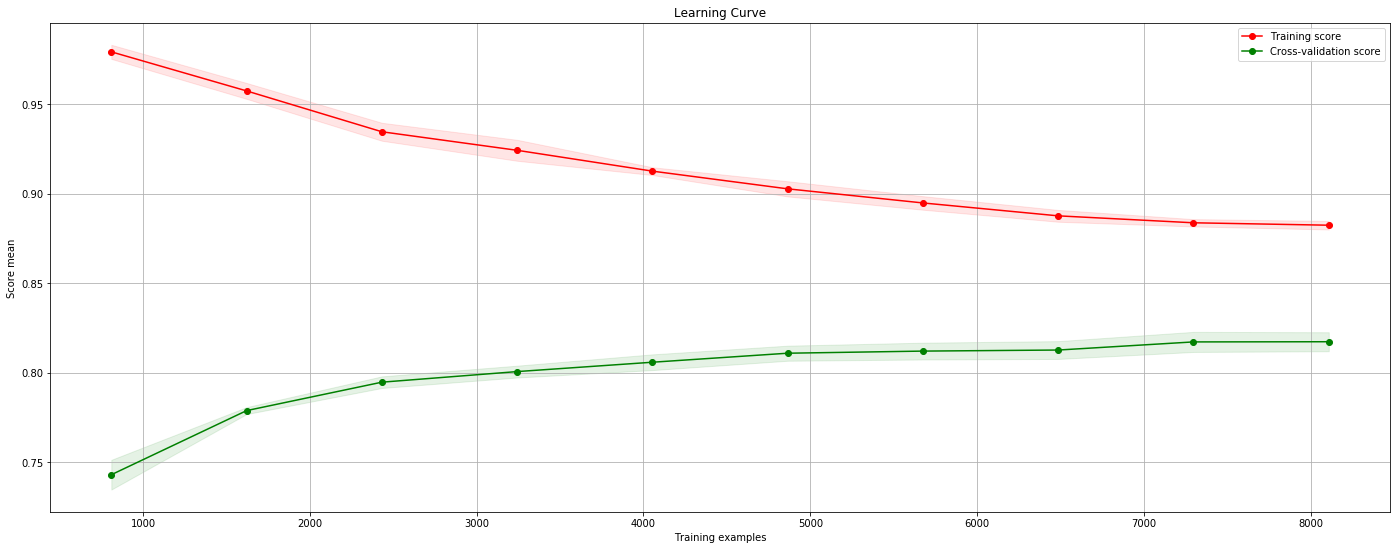

In [10]:
figure = plt.gcf()
figure.set_size_inches(24, 9)
skplot.learning_curve(train_scores, test_scores, train_sizes)
plt.show()